<a href="https://colab.research.google.com/github/foster333/busta/blob/master/iscsdatascience_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                        TITLE  

1-  Formulazione del problema

2- Methodo da usare per la risoluzione del problema

3- Carichiamo le diverse Libraria da usare.

In [127]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree
import seaborn as sn
from matplotlib.legend_handler import HandlerLine2D
np.random.seed(100)#???

               4-  Carico e lettura del dato

In [128]:
## Montiamo il dataset da Google drive a Colab 

path= "/content/drive/MyDrive/Colab Notebooks/classification_dataset.csv"
''' una volta caricato il dataset su google drive e una volta fatto il mounting su colab possiamo estrare il percorso indicando dov'è puthon può andare a prendere i dato
 messo sotto "path".
 '''

' una volta caricato il dataset su google drive e una volta fatto il mounting su colab possiamo estrare il percorso indicando dov\'è puthon può andare a prendere i dato\n messo sotto "path".\n '

In [171]:
# apriamo sotto un dataframe il file contenente i dati da usare.
df = pd.read_csv(path, sep='\t')

5- data glancing 

In [130]:
print(df.shape) # vediamo il numero di righe e colone del nostro dataframe
print(df.info()) # uno sguardo alla strutura del dato

(6775, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6775 non-null   int64  
 1   PROVINCIA            6775 non-null   object 
 2   COMUNE               6775 non-null   object 
 3   LOCALITA             567 non-null    object 
 4   CAMERE               6775 non-null   int64  
 5   SUITE                6775 non-null   int64  
 6   LETTI                6775 non-null   int64  
 7   BAGNI                6775 non-null   int64  
 8   PRIMA_COLAZIONE      6775 non-null   int64  
 9   IN_ABITATO           6668 non-null   float64
 10  SUL_LAGO             6668 non-null   float64
 11  VICINO_ELIPORTO      6668 non-null   float64
 12  VICINO_AEREOPORTO    6668 non-null   float64
 13  ZONA_CENTRALE        6668 non-null   float64
 14  VICINO_IMP_RISALITA  6668 non-null   float64
 15  ZONA_PERIFERICA      6668 n

Ci torna che il nostro dataset ha 6775 righe, osservazioni e 24 colone, variabili. C'è una coeherenza tra i tipo di carattere per ogni variabile e quello che ci si può aspettare. Possiamo già antecipare notare l'esistenza dei valori nulli per certe osservazioni, questo in numero ridotto per le variabili come "LONGITUDINE", "LATITUDINE" con 6728 non-nulli e in numero molto alto per le varibile come "CONGRESSI", "SPORT", "LOCALITA". 

In [131]:
print(df.columns) # vediamo i nomi delle colone, le variabili.
#sotto abbiamo i nomi delle 24 variabili.

Index(['ID', 'PROVINCIA', 'COMUNE', 'LOCALITA', 'CAMERE', 'SUITE', 'LETTI',
       'BAGNI', 'PRIMA_COLAZIONE', 'IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO',
       'VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA',
       'ZONA_PERIFERICA', 'ZONA_STAZIONE_FS', 'ATTREZZATURE_VARIE',
       'CARTE_ACCETTATE', 'LINGUE_PARLATE', 'SPORT', 'CONGRESSI', 'LATITUDINE',
       'LONGITUDINE', 'OUTPUT'],
      dtype='object')


In [132]:
df.head(10) # facciamoci un idea del dataset guardando alle 10 prime righe di tutte le varibili.

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
0,0,BS,PERTICA BASSA,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.373501,45.751381,B&B
1,1,BS,DESENZANO DEL GARDA,NaN,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.538947,45.469485,B&B
2,2,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.665355,45.704158,Case_Appartamenti
3,3,MN,MANTOVA,BOCCABUSA,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",10.828175,45.165506,4_a_5_Stelle
4,4,MI,MILANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.151637,45.457177,Case_Appartamenti
5,5,LC,DERVIO,NaN,3,0,10,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Accesso a vetture pri...",NaN,"Inglese,Francese,Spagnolo",NaN,NaN,9.307951,46.076507,B&B
6,6,CR,CREMONA,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"Biciclette per ospiti,Parco o giardino,Sala te...",NaN,NaN,NaN,NaN,10.028811,45.132638,B&B
7,7,BS,TREMOSINE,NaN,2,0,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.774328,45.793520,Case_Appartamenti
8,8,SO,LIVIGNO,NaN,8,0,25,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.136316,46.537801,Case_Appartamenti
9,9,MI,PERO,NaN,2,0,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Parco o giardino,Post...","American express,Visa,Master Card,Bancomat,Car...","Francese,Spagnolo",NaN,NaN,9.069780,45.519138,B&B


In [133]:
df.tail(10) # ora facciamo la stessa cosa guardando le 10 ultime righe.

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
6765,6765,MN,MONZAMBANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Accesso a vetture private,NaN,"Inglese,Francese,Tedesco",NaN,NaN,10.663781,45.400174,B&B
6766,6766,MI,MILANO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.196980,45.482605,Case_Appartamenti
6767,6767,BS,ISEO,NaN,1,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.056193,45.659818,B&B
6768,6768,BS,SIRMIONE,NaN,23,0,44,23,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Bar,Giochi per bambini,Parco o giardino,Accett...","American express,Visa,Master Card","Inglese,Francese,Tedesco",Piscina scoperta,NaN,10.605859,45.497071,1_a_3_Stelle
6769,6769,BG,BERGAMO,NaN,2,0,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.659076,45.688413,Case_Appartamenti
6770,6770,MI,MILANO,NaN,46,0,50,46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access. diversamente abili parziale,NaN,Inglese,NaN,NaN,9.155438,45.473103,Case_Appartamenti
6771,6771,MI,MILANO,NaN,19,0,25,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.187997,45.461061,Case_Appartamenti
6772,6772,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.668696,45.690735,Case_Appartamenti
6773,6773,BG,RIVA DI SOLTO,NaN,2,0,6,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Access. diversamente abili totale,Accettazione...",NaN,NaN,NaN,NaN,10.038911,45.779892,Case_Appartamenti
6774,6774,SO,CAMPODOLCINO,Fraciscio,4,0,20,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.366251,46.405137,Case_Appartamenti


Guardando alle prime 10 righe e le ultime 10 righe possiamo vedere che la variabile OUTCOME contienne le osservazioni "target", quindi l'"OUTPUT" è la nostra variabile dipendente versus tutte le altre variabili che formano i set di variabili indipendenti. 
Oltre a questa si osserva la presenza dei valori NaN, e questo ripresenta un problema che dobbiamo risolvere.

In [134]:
df.describe() # Vediamo un veloce riassunto della statistica descrittiva di tutte le variabili 

,ID,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,LATITUDINE,LONGITUDINE
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6728.000000,6728.000000
mean,3387.000000,16.261550,0.455646,35.002509,13.620517,0.101402,0.084883,0.053389,0.000600,0.028344,0.100630,0.003749,0.052190,0.072286,9.781580,45.687101
std,1955.918369,35.859435,3.592147,93.538492,29.174499,0.301883,0.278728,0.224825,0.024487,0.165967,0.300861,0.061121,0.222426,0.258980,0.648691,0.325087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.976468,41.327946
25%,1693.500000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.202952,45.479931
50%,3387.000000,4.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.676006,45.643643
75%,5080.500000,14.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.462731,45.813644
max,6774.000000,528.000000,110.000000,1816.000000,448.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.818532,46.555713


Il numero di ID= 6775 coincide con il numero totale delle osservazioni. 
il numero massimo: di camere per una struttura è di 528, di LETTI è di 1816.
c'è una varianza grande tra le strutture per quanto riguarda il numero di "LETTI" come le indica la std=93.538.
...

In [135]:
df.describe(include = "all")# ora vediamo la statistica descrittiva includendo gli eventuali valori nulli e NaN

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
count,6775.000000,6775,6775,567,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,4016,2070,3095,607,307,6728.000000,6728.000000,6775
unique,NaN,12,947,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2759,703,213,166,232,NaN,NaN,5
top,NaN,BS,MILANO,COLOMBARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accettazione animali domestici,Tutte,"Inglese,Francese",Piscina scoperta,"Numero sale congressi 1,Congressi capacita' Ma...",NaN,NaN,Case_Appartamenti
freq,NaN,2105,1018,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,486,603,101,6,NaN,NaN,2910
mean,3387.000000,NaN,NaN,NaN,16.261550,0.455646,35.002509,13.620517,0.101402,0.084883,0.053389,0.000600,0.028344,0.100630,0.003749,0.052190,0.072286,NaN,NaN,NaN,NaN,NaN,9.781580,45.687101,NaN
std,1955.918369,NaN,NaN,NaN,35.859435,3.592147,93.538492,29.174499,0.301883,0.278728,0.224825,0.024487,0.165967,0.300861,0.061121,0.222426,0.258980,NaN,NaN,NaN,NaN,NaN,0.648691,0.325087,NaN
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.976468,41.327946,NaN
25%,1693.500000,NaN,NaN,NaN,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,9.202952,45.479931,NaN
50%,3387.000000,NaN,NaN,NaN,4.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,9.676006,45.643643,NaN
75%,5080.500000,NaN,NaN,NaN,14.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,10.462731,45.813644,NaN


6- lavorazione del dataset e sistemazione dei NaN

In [136]:
# Verifichiamo la presenza dei NaN per ciascuna variabile.
Na = pd.concat([df.isna().sum()], axis=1, keys=["null"])
print(Na[Na.sum(axis=1)>0])

# remove localita... 

                     null
LOCALITA             6208
IN_ABITATO            107
SUL_LAGO              107
VICINO_ELIPORTO       107
VICINO_AEREOPORTO     107
ZONA_CENTRALE         107
VICINO_IMP_RISALITA   107
ZONA_PERIFERICA       107
ZONA_STAZIONE_FS      107
ATTREZZATURE_VARIE   2759
CARTE_ACCETTATE      4705
LINGUE_PARLATE       3680
SPORT                6168
CONGRESSI            6468
LATITUDINE             47
LONGITUDINE            47


In [173]:
#   Togliamo le variabili con elato numero di NaN e quelle giudicate non rilevante per l'esercizion
df.columns
del df["LOCALITA"] 
del df["ATTREZZATURE_VARIE"]
del df["CARTE_ACCETTATE"]
del df["LINGUE_PARLATE"]
del df["SPORT"]
del df["CONGRESSI"]
del df["ID"]
del df["LATITUDINE"]
del df["LONGITUDINE"]
df.columns

Index(['PROVINCIA', 'COMUNE', 'CAMERE', 'SUITE', 'LETTI', 'BAGNI',
       'PRIMA_COLAZIONE', 'IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO',
       'VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA',
       'ZONA_PERIFERICA', 'ZONA_STAZIONE_FS', 'OUTPUT'],
      dtype='object')

7- Analisi descrittiva 

7.1 Analisi **univariata**

count    6775.000000
mean        0.455646
std         3.592147
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       110.000000
Name: SUITE, dtype: float64


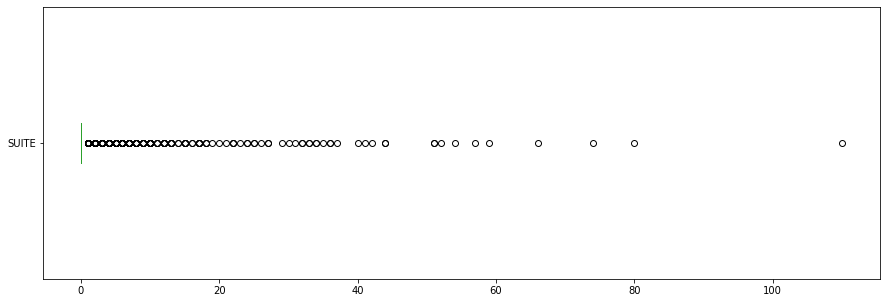

In [138]:
print(df.SUITE.describe())
df.SUITE.plot(kind= "box", vert= False, figsize=(15, 5))

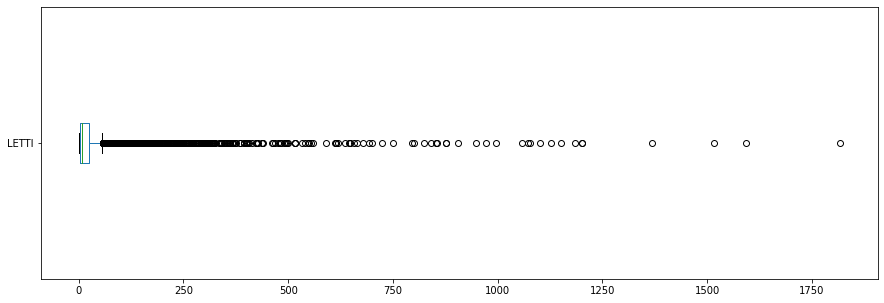

In [139]:
df.LETTI.plot(kind= "box", vert= False, figsize=(15, 5))

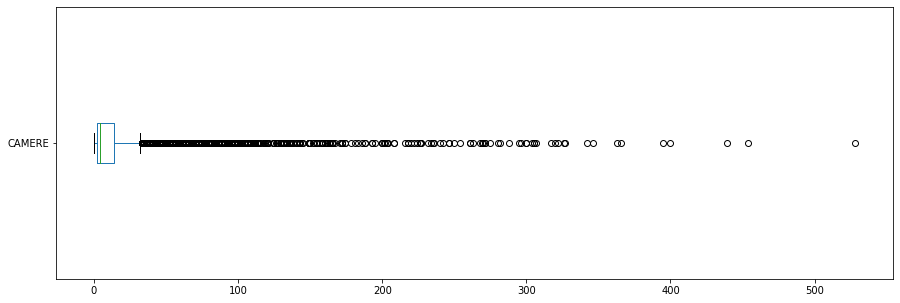

In [140]:
df.CAMERE.plot(kind= "box", vert= False, figsize=(15, 5))

In [141]:
print(df.OUTPUT.value_counts(normalize=True))

Case_Appartamenti    0.429520
B&B                  0.256384
1_a_3_Stelle         0.221993
4_a_5_Stelle         0.072177
Campeggio            0.019926
Name: OUTPUT, dtype: float64


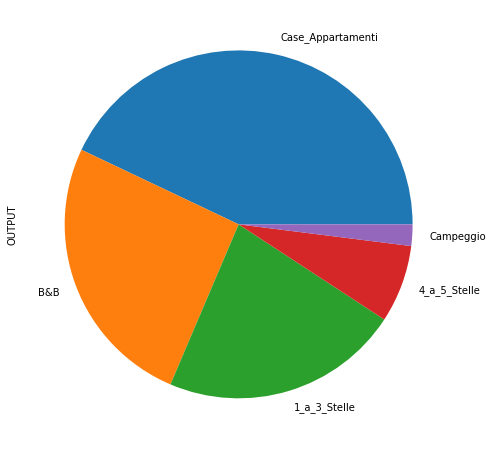

In [142]:
df.OUTPUT.value_counts().plot(kind= "pie", figsize=(8,8))

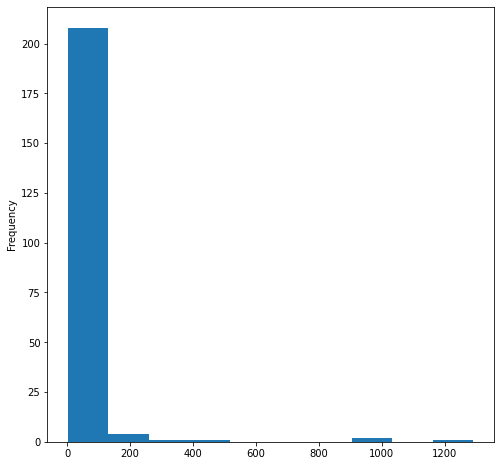

In [178]:
df.CAMERE.value_counts().plot(kind= "hist", figsize=(8,8))

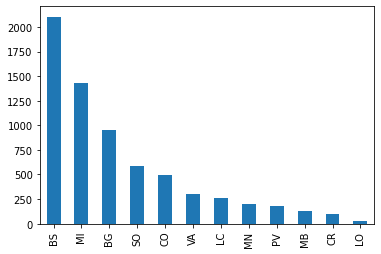

In [180]:
df.PROVINCIA.value_counts().plot(kind= "bar")


6.2 Analisi multivariata

In [146]:
# Verifichiamo l'esistenza di relazioni significative tra le variabili.
cor = df.corr()
cor

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS
CAMERE,1.000000,0.250814,0.943318,0.882555,0.139727,0.096112,0.310949,0.036273,0.042624,0.028147,0.020841,-0.023769,0.095739
SUITE,0.250814,1.000000,0.190559,0.320935,0.067926,0.005643,0.010170,0.047624,0.001124,0.047282,0.003678,-0.013804,0.052768
LETTI,0.943318,0.190559,1.000000,0.737654,0.082769,0.050983,0.358609,0.026375,0.022701,0.002642,0.012357,-0.026180,0.051113
BAGNI,0.882555,0.320935,0.737654,1.000000,0.202860,0.144252,0.187176,0.048113,0.067763,0.064303,0.031586,-0.010313,0.144369
PRIMA_COLAZIONE,0.139727,0.067926,0.082769,0.202860,1.000000,0.133854,0.107344,0.032223,0.040988,0.112958,0.044196,0.032333,0.062857
IN_ABITATO,0.096112,0.005643,0.050983,0.144252,0.133854,1.000000,0.001871,0.014515,-0.019593,-0.067891,0.095773,-0.059370,0.006413
SUL_LAGO,0.310949,0.010170,0.358609,0.187176,0.107344,0.001871,1.000000,-0.005818,-0.040562,-0.032872,-0.014569,-0.046730,-0.045683
VICINO_ELIPORTO,0.036273,0.047624,0.026375,0.048113,0.032223,0.014515,-0.005818,1.000000,-0.004184,0.012164,-0.001503,-0.005749,0.040465
VICINO_AEREOPORTO,0.042624,0.001124,0.022701,0.067763,0.040988,-0.019593,-0.040562,-0.004184,1.000000,0.132113,-0.010478,0.122448,0.234986
ZONA_CENTRALE,0.028147,0.047282,0.002642,0.064303,0.112958,-0.067891,-0.032872,0.012164,0.132113,1.000000,-0.020520,-0.076251,0.239660


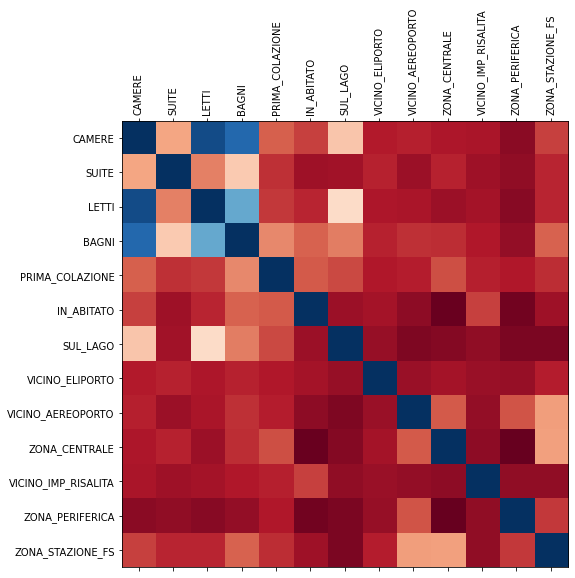

In [147]:
# graficamente abbiamo,
fig = plt.figure(figsize=(8,8))
plt.matshow(cor, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(cor.columns)), cor.columns, rotation="vertical");
plt.yticks(range(len(cor.columns)), cor.columns);

Existono forte correlazioni tra le variabile come per esempio tra camere e letti e bagni, zona_centrale e zone periferica, sul_lago e zona_periferica.
Ma preferiamo non adjustare ne togliere nessun di queste variabile visto che il modello, random forest classifier da usare per il nostro compito di classificazione non avrà nessun problema di acuracy dovuto a questa situazione. 

In [148]:
print(df.OUTPUT.unique())
propout= df["OUTPUT"].value_counts(sort=1)
propout  #???proportion

['B&B' 'Case_Appartamenti' '4_a_5_Stelle' '1_a_3_Stelle' 'Campeggio']


Case_Appartamenti    2910
B&B                  1737
1_a_3_Stelle         1504
4_a_5_Stelle          489
Campeggio             135
Name: OUTPUT, dtype: int64

In [149]:
BB = ["B&B"]
Case = ['Case_Appartamenti']
quac = ['4_a_5_Stelle']
unods = ['1_a_3_Stelle']
Campeggio = ['Campeggio']
df[df.OUTPUT.isin(BB)] =1
df[df.OUTPUT.isin(Case)] =3
df[df.OUTPUT.isin(quac)] =5
df[df.OUTPUT.isin(unods)] =4
df[df.OUTPUT.isin(Campeggio)] =2
df.OUTPUT
df.head(20)

,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,OUTPUT
0,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
3,5,5,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
4,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
5,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
6,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
8,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
9,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [150]:
Y =   df["OUTPUT"].values
Y = Y.astype("int")
Y

array([1, 1, 3, ..., 3, 3, 3])

In [151]:
Y= df["OUTPUT"].values
Y

array([1, 1, 3, ..., 3, 3, 3], dtype=object)

In [152]:
# let define the dependent variable Y and the independent variables X.
X = df.drop(labels=["OUTPUT"], axis=1)
print(df.head)


<bound method NDFrame.head of      PROVINCIA COMUNE  CAMERE  ...  ZONA_PERIFERICA  ZONA_STAZIONE_FS  OUTPUT
0            1      1       1  ...              1.0               1.0       1
1            1      1       1  ...              1.0               1.0       1
2            3      3       3  ...              3.0               3.0       3
3            5      5       5  ...              5.0               5.0       5
4            3      3       3  ...              3.0               3.0       3
...        ...    ...     ...  ...              ...               ...     ...
6770         3      3       3  ...              3.0               3.0       3
6771         3      3       3  ...              3.0               3.0       3
6772         3      3       3  ...              3.0               3.0       3
6773         3      3       3  ...              3.0               3.0       3
6774         3      3       3  ...              3.0               3.0       3

[6775 rows x 16 columns]>


In [153]:
print(X)

     PROVINCIA COMUNE  ...  ZONA_PERIFERICA  ZONA_STAZIONE_FS
0            1      1  ...              1.0               1.0
1            1      1  ...              1.0               1.0
2            3      3  ...              3.0               3.0
3            5      5  ...              5.0               5.0
4            3      3  ...              3.0               3.0
...        ...    ...  ...              ...               ...
6770         3      3  ...              3.0               3.0
6771         3      3  ...              3.0               3.0
6772         3      3  ...              3.0               3.0
6773         3      3  ...              3.0               3.0
6774         3      3  ...              3.0               3.0

[6775 rows x 15 columns]


In [154]:
print(Xr)

     PROVINCIA COMUNE  ...  ZONA_PERIFERICA  ZONA_STAZIONE_FS
0            1      1  ...              1.0               1.0
1            1      1  ...              1.0               1.0
2            3      3  ...              3.0               3.0
3            5      5  ...              5.0               5.0
4            3      3  ...              3.0               3.0
...        ...    ...  ...              ...               ...
6770         3      3  ...              3.0               3.0
6771         3      3  ...              3.0               3.0
6772         3      3  ...              3.0               3.0
6773         3      3  ...              3.0               3.0
6774         3      3  ...              3.0               3.0

[6775 rows x 15 columns]


In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 20)
Y = Y.astype("int")
print(X_test)
Y_test

     PROVINCIA COMUNE  ...  ZONA_PERIFERICA  ZONA_STAZIONE_FS
766          1      1  ...              1.0               1.0
1277         4      4  ...              4.0               4.0
2133         1      1  ...              1.0               1.0
2563         3      3  ...              3.0               3.0
3998         4      4  ...              4.0               4.0
...        ...    ...  ...              ...               ...
3200         3      3  ...              3.0               3.0
4696         3      3  ...              3.0               3.0
3763         1      1  ...              1.0               1.0
2506         3      3  ...              3.0               3.0
6192         3      3  ...              3.0               3.0

[2033 rows x 15 columns]


array([1, 4, 1, ..., 1, 3, 3])

In [163]:
# creazione di un modello random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=30)# random state?
# fitting the model
model =model.fit(X_train, Y_train)
model
#len(model.estimators_)
#model.estimators_

RandomForestClassifier(random_state=30)

In [164]:
# ora dobbiamo fare une predizione applicando il modello di classificazione "trainato" sul test set
Yhat = model.predict(X_test)
Yhat

array([1, 4, 1, ..., 1, 3, 3])

[Text(418.5, 475.65000000000003, 'X[0] <= 1.5\ngini = 0.692\nsamples = 2978\nvalue = [1198, 89, 2084, 998, 373]'),
 Text(279.0, 339.75, 'gini = 0.0\nsamples = 742\nvalue = [1198, 0, 0, 0, 0]'),
 Text(558.0, 339.75, 'X[12] <= 3.5\ngini = 0.563\nsamples = 2236\nvalue = [0, 89, 2084, 998, 373]'),
 Text(279.0, 203.85000000000002, 'X[14] <= 2.5\ngini = 0.079\nsamples = 1388\nvalue = [0, 89, 2084, 0, 0]'),
 Text(139.5, 67.94999999999999, 'gini = 0.0\nsamples = 56\nvalue = [0, 89, 0, 0, 0]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 1332\nvalue = [0, 0, 2084, 0, 0]'),
 Text(837.0, 203.85000000000002, 'X[12] <= 4.5\ngini = 0.396\nsamples = 848\nvalue = [0, 0, 0, 998, 373]'),
 Text(697.5, 67.94999999999999, 'gini = 0.0\nsamples = 623\nvalue = [0, 0, 0, 998, 0]'),
 Text(976.5, 67.94999999999999, 'gini = 0.0\nsamples = 225\nvalue = [0, 0, 0, 0, 373]')]

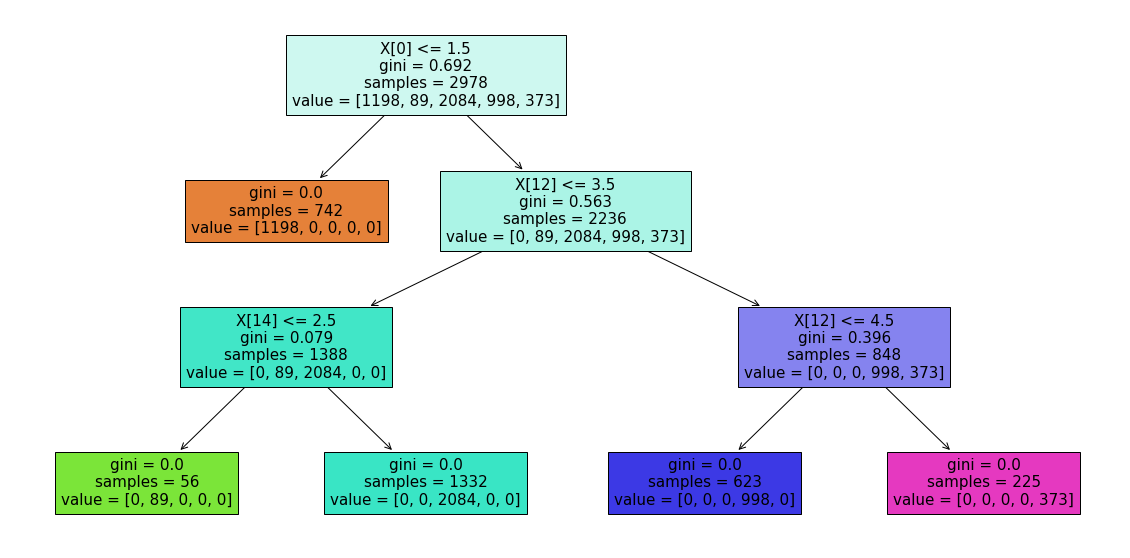

In [165]:
# plot decision trees
plt.figure(figsize=(20, 10))
tree.plot_tree(model.estimators_[19], filled= True)

In [166]:
for i in range (len(model.estimators_)):
  print(tree.export_text(model.estimators_[i]))

|--- feature_11 <= 1.50
|   |--- class: 0.0
|--- feature_11 >  1.50
|   |--- feature_1 <= 3.50
|   |   |--- feature_9 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_9 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_1 >  3.50
|   |   |--- feature_4 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_4 >  4.50
|   |   |   |--- class: 4.0

|--- feature_8 <= 1.50
|   |--- class: 0.0
|--- feature_8 >  1.50
|   |--- feature_0 <= 3.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_12 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_0 >  3.50
|   |   |--- feature_1 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_1 >  4.50
|   |   |   |--- class: 4.0

|--- feature_2 <= 1.50
|   |--- class: 0.0
|--- feature_2 >  1.50
|   |--- feature_0 <= 3.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_0 >  3.50
|   |   |--- feature_8 <= 4.50
|   |   |   |

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score
conmatr = confusion_matrix(Y_test, Yhat,)
score=accuracy_score(Y_test, Yhat)
print(conmatr)
print(score)

[[572   0   0   0   0]
 [  0  42   0   0   0]
 [  0   0 821   0   0]
 [  0   0   0 467   0]
 [  0   0   0   0 131]]
1.0


Text(69.0, 0.5, 'Truth')

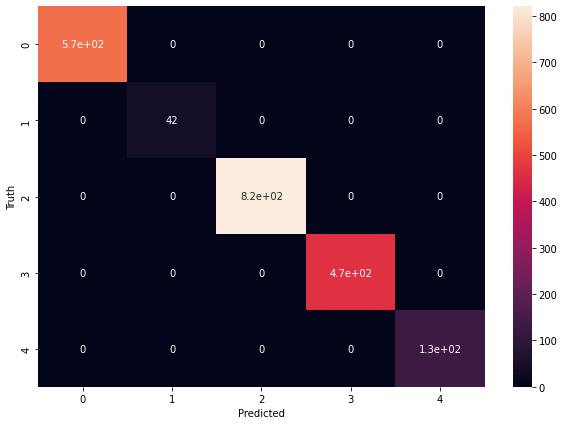

In [168]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(conmatr, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [169]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [170]:
#  Vediamo quanto importante sono le variabili indipendenti nel nostro modello
Xvar = list(X.columns)
Ximp = pd.Series(model.feature_importances_, index = Xvar).sort_values(ascending=False)
Ximp


PROVINCIA              0.107110
VICINO_IMP_RISALITA    0.094105
BAGNI                  0.080867
SUL_LAGO               0.073517
ZONA_STAZIONE_FS       0.072964
ZONA_PERIFERICA        0.069836
CAMERE                 0.069517
SUITE                  0.066488
VICINO_AEREOPORTO      0.063503
COMUNE                 0.061041
ZONA_CENTRALE          0.057089
LETTI                  0.053338
VICINO_ELIPORTO        0.046691
IN_ABITATO             0.046308
PRIMA_COLAZIONE        0.037627
dtype: float64